In [171]:
import pandas as pd
import numpy as np

In [172]:
df = pd.read_csv("/content/train (1).csv")

In [173]:
X = df.iloc[:,3]

In [179]:
y = df.iloc[:,-1]

In [180]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [181]:
import matplotlib.pyplot as plt

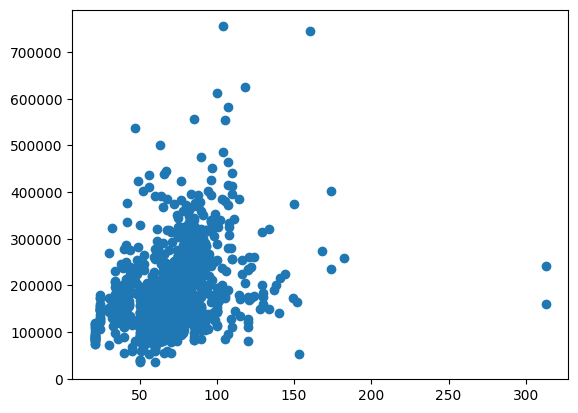

In [182]:
plt.scatter(X,y)

In [183]:
X = X.values.reshape(len(X),1)
y = y.values.reshape(len(y),1)

In [ ]:
for values in X:
  print(values)

In [185]:
nan_indices = np.isnan(X).any(axis=1)

In [186]:
# Remove rows with NaN values from X and y
X_clean = X[~nan_indices]
y_clean = y[~nan_indices]

In [187]:
X_clean.shape, y_clean.shape

((1201, 1), (1201, 1))

In [190]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [191]:
# Fit and transform the non-bias columns of X
X_clean = sc.fit_transform(X_clean)

In [194]:
#transform y
y_clean = sc.transform(y_clean)

In [196]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta(w) as parameter in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)  #y = wx+b
    print(predictions) 
    square_err=(predictions - y)**2   #f(x(i))-y(i)
    print(np.isfinite(square_err))
    print(square_err) 
    cost = 1/(2*m) * np.sum(square_err)
    print(cost)
    return cost

In [198]:
X_clean=np.append(np.ones((len(X_clean),1)),X_clean[:,0].reshape(len(X_clean),1),axis=1)
theta=np.zeros((2,1))

In [199]:
X_clean.shape, theta.shape

((1201, 2), (2, 1))

In [201]:
print(X_clean)
currentCost = computeCost(X_clean,y_clean,theta)

[[ 1.         -0.20803433]
 [ 1.          0.40989452]
 [ 1.         -0.08444856]
 ...
 [ 1.         -0.16683907]
 [ 1.         -0.08444856]
 [ 1.          0.20391824]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
[[7.37249816e+07]
 [5.58614733e+07]
 [8.47182938e+07]
 ...
 [1.20464896e+08]
 [3.42457883e+07]
 [3.68863651e+07]]
33602139.88873203


In [202]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

print(X_clean)
theta,J_history = gradientDescent(X_clean,y_clean,theta,0.01,1500)
fn = "h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1"

Streaming output truncated to the last 5000 lines.
 [ 3468120.63977466]
 ...
 [13936885.74470724]
 [ 2220025.25257018]
 [ 2614368.9041722 ]]
5165916.681518357
[[7192.67211257]
 [7939.13771744]
 [7341.96523354]
 ...
 [7242.43648623]
 [7341.96523354]
 [7690.31584915]]
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
[[ 1942269.11540021]
 [  216303.47812052]
 [ 3468119.88033494]
 ...
 [13936884.24294401]
 [ 2220025.86018061]
 [ 2614369.59482783]]
5165916.681513992
[[7192.67231032]
 [7939.13793572]
 [7341.9654354 ]
 ...
 [7242.43668535]
 [7341.9654354 ]
 [7690.31606059]]
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
[[ 1942268.56419408]
 [  216303.6811571 ]
 [ 3468119.12848969]
 ...
 [13936882.75619849]
 [ 2220026.46171502]
 [ 2614370.27857699]]
5165916.6815097155
[[7192.6725061 ]
 [7939.13815181]
 [7341.96563525]
 ...
 [7242.43688248]
 [7341.96563525]
 [7690.31626991]]
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
[[ 1942268.01850008]
 [  216303.8821

Text(0.5, 1.0, 'Cost function using Gradient Descent')

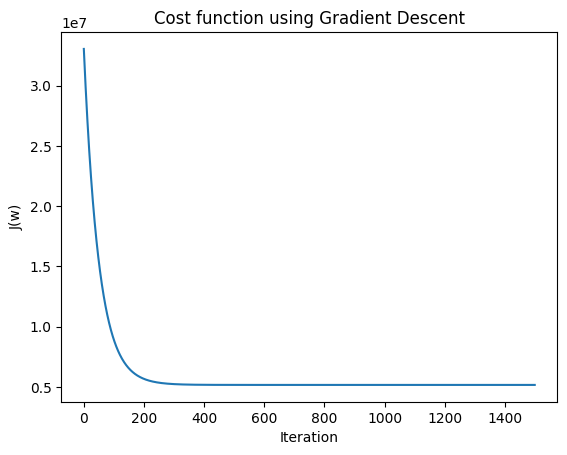

In [235]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("J(w)")
plt.title("Cost function using Gradient Descent")

In [203]:
print(fn)

h(x) =7444.0 + 1208.02x1


In [204]:
X_clean

array([[ 1.        , -0.20803433],
       [ 1.        ,  0.40989452],
       [ 1.        , -0.08444856],
       ...,
       [ 1.        , -0.16683907],
       [ 1.        , -0.08444856],
       [ 1.        ,  0.20391824]])

In [206]:
test_x = [x[1] for x in X_clean]

In [207]:
test_x

[-0.20803433059888823,
 0.4098945178329282,
 -0.08444856091252495,
 -0.4140106134094937,
 0.5746755440814125,
 0.6158708006435336,
 0.2039182350223227,
 -0.7847679224685835,
 -0.8259631790307046,
 -0.0020580477882827593,
 0.6158708006435336,
 0.8630423400162602,
 -0.7847679224685835,
 0.08033246533595943,
 -0.16683907403676715,
 -0.0020580477882827593,
 1.2749949056374712,
 -0.537596383095857,
 0.2039182350223227,
 -1.0731347184034312,
 1.645752214696561,
 -0.4140106134094937,
 1.1514091359511078,
 -0.949548948717068,
 -0.4140106134094937,
 -0.8259631790307046,
 0.6158708006435336,
 -0.0020580477882827593,
 -0.4140106134094937,
 1.563361701572319,
 1.7281427278208032,
 0.16272297846020162,
 -0.08444856091252495,
 -0.20803433059888823,
 0.5746755440814125,
 1.8517284975071664,
 -0.0020580477882827593,
 -0.3728153568473726,
 -0.9083536921549469,
 0.5746755440814125,
 -1.5262825405867633,
 -0.16683907403676715,
 -0.7435726659064624,
 1.645752214696561,
 -0.08444856091252495,
 -0.414010613

In [208]:
y_value=[y*theta[1]+theta[0] for y in test_x]

In [219]:
for x,y in zip(test_x,y_value):
  print(str(x)+" : "+str(y))

-0.20803433059888823 : [7192.68984791]
0.4098945178329282 : [7939.15729337]
-0.08444856091252495 : [7341.983337]
-0.4140106134094937 : [6943.86736608]
0.5746755440814125 : [8138.21527883]
0.6158708006435336 : [8187.9797752]
0.2039182350223227 : [7690.33481155]
-0.7847679224685835 : [6495.9868988]
-0.8259631790307046 : [6446.22240244]
-0.0020580477882827593 : [7441.51232973]
0.6158708006435336 : [8187.9797752]
0.8630423400162602 : [8486.56675338]
-0.7847679224685835 : [6495.9868988]
0.08033246533595943 : [7541.04132246]
-0.16683907403676715 : [7242.45434427]
-0.0020580477882827593 : [7441.51232973]
1.2749949056374712 : [8984.21171703]
-0.537596383095857 : [6794.57387699]
0.2039182350223227 : [7690.33481155]
-1.0731347184034312 : [6147.63542425]
1.645752214696561 : [9432.09218431]
-0.4140106134094937 : [6943.86736608]
1.1514091359511078 : [8834.91822793]
-0.949548948717068 : [6296.92891334]
-0.4140106134094937 : [6943.86736608]
-0.8259631790307046 : [6446.22240244]
0.6158708006435336 : [

In [220]:
X_clean,y_clean

(array([[ 1.        , -0.20803433],
        [ 1.        ,  0.40989452],
        [ 1.        , -0.08444856],
        ...,
        [ 1.        , -0.16683907],
        [ 1.        , -0.08444856],
        [ 1.        ,  0.20391824]]),
 array([[ 8586.3252672 ],
        [ 7474.05334002],
        [ 9204.25411563],
        ...,
        [10975.6501478 ],
        [ 5851.99011288],
        [ 6073.41461691]]))

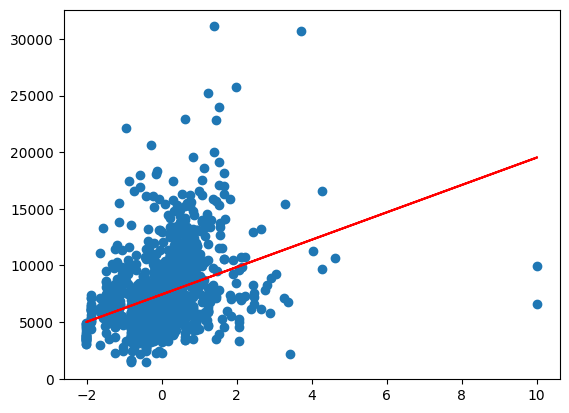

In [222]:
plt.scatter(X_clean[:,1:],y_clean)
plt.plot(test_x,y_value,color="r") #7444.0 + 1208.02x1

In [227]:
# Assuming test_x and y_value are in the transformed form
test_x_original_scale = sc.inverse_transform(X_clean)
y_value_original_scale = sc.inverse_transform(y_value)

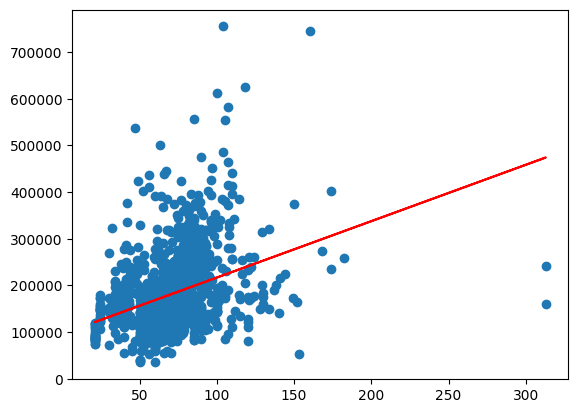

In [233]:
plt.scatter(df.iloc[:,3],df.iloc[:,-1])
plt.plot(test_x_original_scale[:,1:],y_value_original_scale,color="r")